In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
df = pd.read_csv("C:\\Users\\MANU VENUGOPAL\\OneDrive\\Desktop\\Udemy\\MachineLearning_Jose\\DATA\\hearing_test.csv")
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             5000 non-null   float64
 1   physical_score  5000 non-null   float64
 2   test_result     5000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 117.3 KB


In [68]:
df.describe()

,age,physical_score,test_result
count,5000.000000,5000.000000,5000.000000
mean,51.609000,32.760260,0.600000
std,11.287001,8.169802,0.489947
min,18.000000,-0.000000,0.000000
25%,43.000000,26.700000,0.000000
50%,51.000000,35.300000,1.000000
75%,60.000000,38.900000,1.000000
max,90.000000,50.000000,1.000000


# EDA

In [69]:
df['test_result'].value_counts()

1    3000
0    2000
Name: test_result, dtype: int64

<AxesSubplot: xlabel='test_result', ylabel='count'>

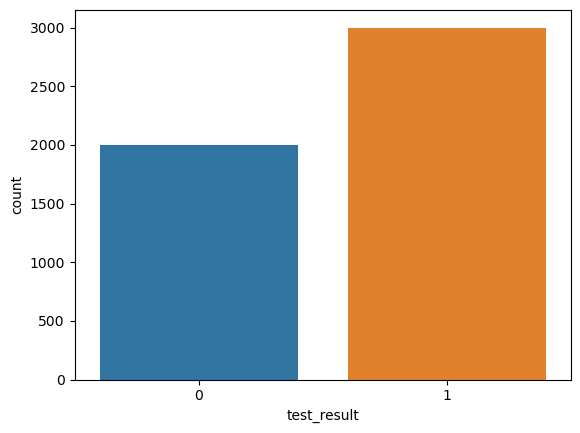

In [70]:
# Visualizing the the number of 0's and 1's in the test_result feature

sns.countplot(x='test_result', data=df)

<AxesSubplot: xlabel='test_result', ylabel='physical_score'>

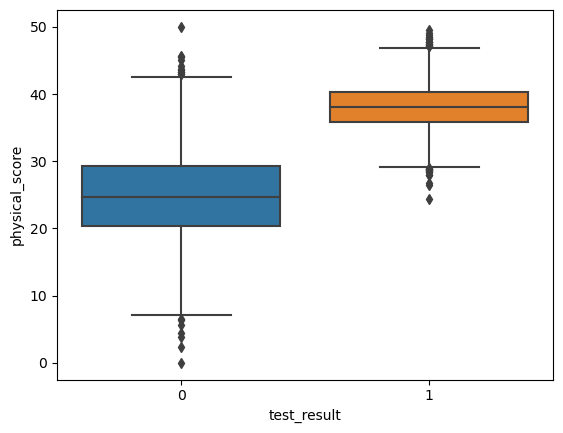

In [71]:
# We can see that people with high pysival score is more capable of passing the hearing test.
# In other words most of the people who failed (0's) the test is with low physical score

sns.boxplot(x='test_result', y='physical_score', data=df)

<AxesSubplot: xlabel='test_result', ylabel='age'>

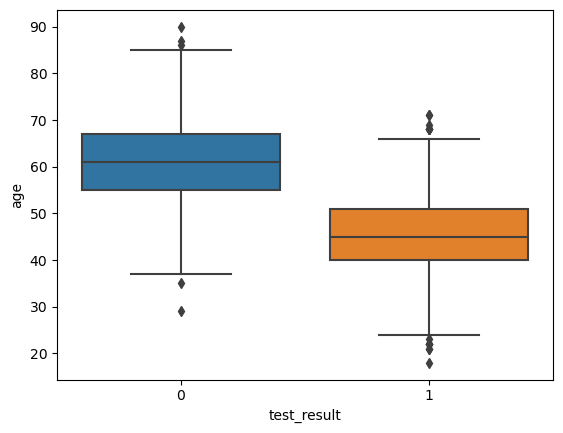

In [72]:
# Probability of passing the test decreases with increase in age.

sns.boxplot(x='test_result', y='age', data=df)

<AxesSubplot: xlabel='age', ylabel='physical_score'>

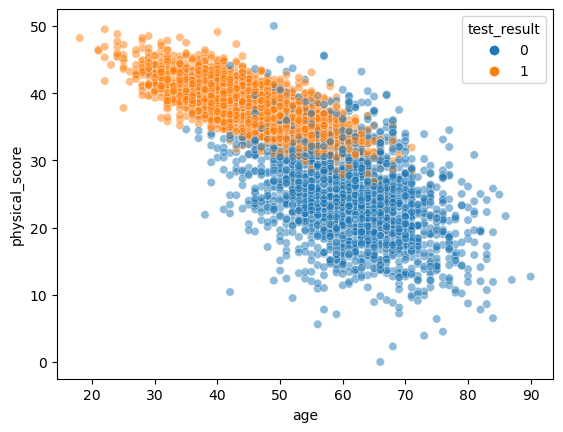

In [73]:
sns.scatterplot(x='age', y= 'physical_score', hue='test_result', data=df,
               alpha = 0.5)

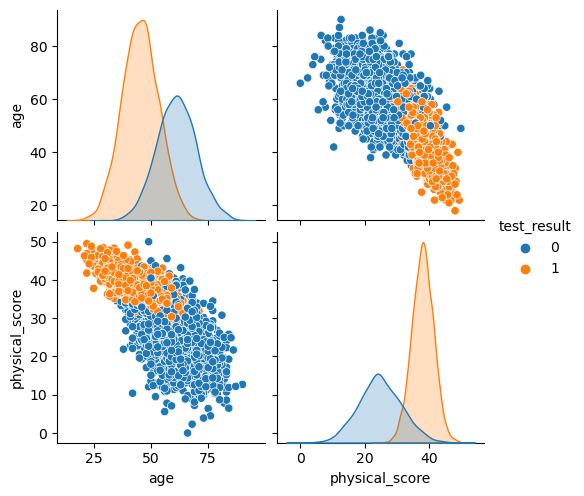

In [74]:
sns.pairplot(hue='test_result', data=df)

# Data Preprocessing

In [101]:
X = df.drop('test_result', axis=1)
y = df['test_result']

In [102]:
from sklearn.model_selection import train_test_split

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=101)

In [117]:
from sklearn.preprocessing import StandardScaler

In [118]:
scalar = StandardScaler()
X_train_scaled = scalar.fit_transform(X_train)
X_test_scaled = scalar.transform(X_test)

# Model Creation and Execution

In [119]:
from sklearn.linear_model import LogisticRegression

In [120]:
log_model = LogisticRegression()

In [121]:
log_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [122]:
y_pred = log_model.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [123]:
y_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [124]:
y_pred_prob = log_model.predict_proba(X_test)
y_pred_prob

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


array([[0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [9.89675009e-12, 1.00000000e+00],
       ...,
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00]])

# Performance Evaluation

In [125]:
from sklearn.metrics import plot_confusion_matrix, accuracy_score, classification_report

In [126]:
# How accurate the model is.

accuracy_score(y_test, y_pred)

0.6515151515151515

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


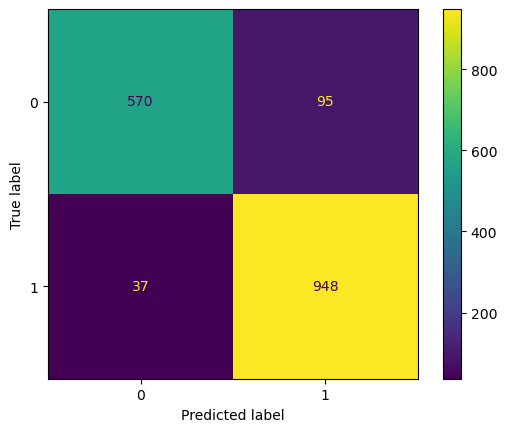

In [127]:
# To Visualize how well the model model classify every instance.

plot_confusion_matrix(log_model, X_test_scaled, y_test)

In [128]:
# To get the precision, Recall values we will run the classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.14      0.24       665
           1       0.63      1.00      0.77       985

    accuracy                           0.65      1650
   macro avg       0.82      0.57      0.51      1650
weighted avg       0.78      0.65      0.56      1650



In [130]:
# If we want the precision and recall score seperately

from sklearn.metrics import precision_score, recall_score

recall_score(y_test, y_pred)

1.0

In [131]:
precision_score(y_test, y_pred)

0.6314102564102564

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


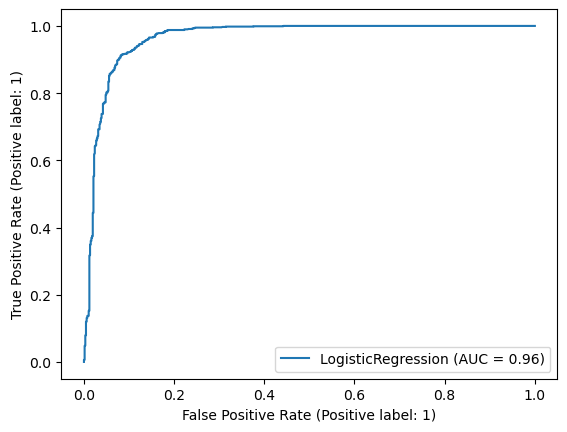

In [135]:
# Roc Curve

from sklearn.metrics import plot_roc_curve

plot_roc_curve(log_model, X_test_scaled, y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


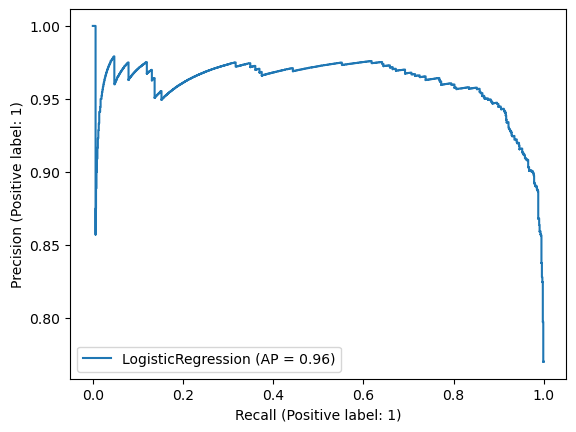

In [137]:
# Precision Recall Curve

from sklearn.metrics import plot_precision_recall_curve

plot_precision_recall_curve(log_model, X_test_scaled, y_test)